# Análise exploratória de dados em comunidades (subreddits) brasileiras

Atentados a escolas no Brasil cresceram em disparada nos últimos anos e acredito que muito disso se dá em grande parte pela forma que os algoritmos favorecem temas polêmicos pela internet e como isso ajuda a criar ninhos de discurso de ódio e radicalização de adolescentes levando consequentemente a um maior número de casos.

In [ ]:
# Importando módulos e bibliotecas necessárias
import praw
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import string
import itertools
from itertools import combinations
import numpy as np
import seaborn as sns
import pandas as pd
import re
from nltk.tokenize import sent_tokenize
from matplotlib.patches import Patch

In [ ]:
# Downloads necessários
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\apart\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\apart\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\apart\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\apart\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\apart\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\apart\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

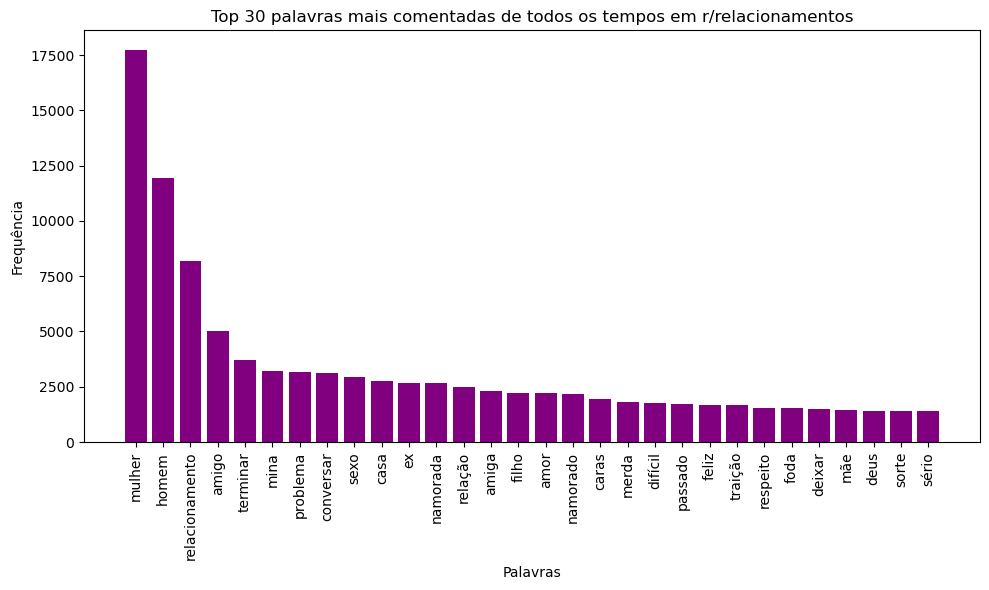

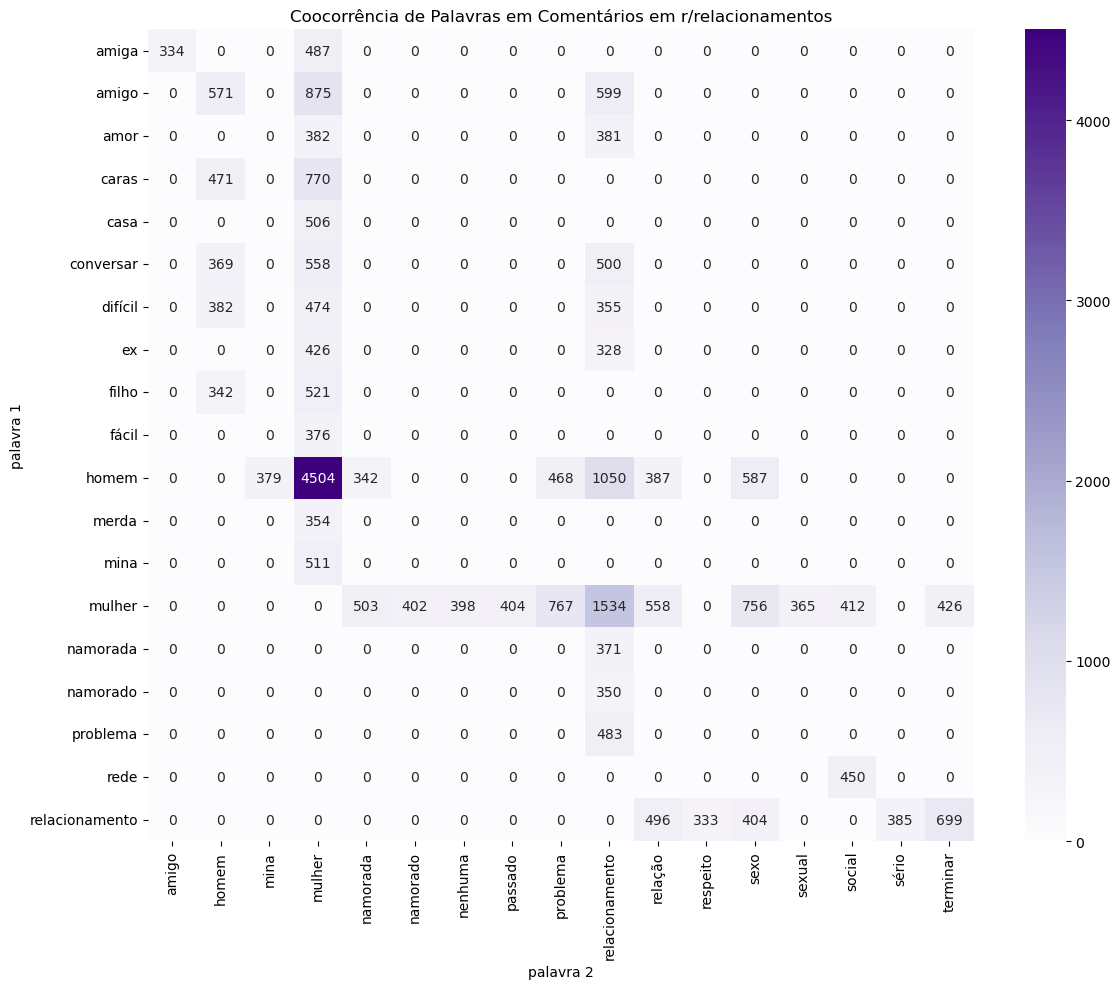

In [ ]:
reddit = praw.Reddit(
    client_id='GyjDNqRJkogHmGGyYOUsrw', # client_id, código alfa-numérico abaixo do nome dado ao seu aplicativo
    client_secret='ZsrZ_gdVZ-GhcdgViwbne96a3E_0KA', # client_secret
    user_agent='script:br_sub_analysis:v1.0 (by u/surfistapratiado)' # user_agent, descrição com seu nickname
)

# Define o subreddit em específico
subreddit = reddit.subreddit('relacionamentos') 

# Coleta dos 1000 posts mais populares de todos os tempos do sub escolhido
top_posts = subreddit.top(time_filter='all', limit=500) # outras opções são 'week', 'month' e 'year'

# Acumula todos os comentários
all_comments = []

for post in top_posts:
    # Remove objetos "MoreComments" para facilizar a extração
    post.comments.replace_more(limit=0)
    for comment in post.comments.list():
        # Adiciona o conteúdo de cada comentário na lista
        all_comments.append(comment.body)

# Concatena todos os comentários em uma string e converte para minúsculas
all_text = ' '.join(all_comments).lower()
# tokeniza o texto, separando o texto
tokens = word_tokenize(all_text)

# Remove stopwords e pontuação
stop_words = set(stopwords.words('portuguese'))

# Conjunto de stopwords adicionais como gírias, abreviações e palavras comuns irrelevantes
custom_stopwords = {
    'pq','hj','vlw','obg','q','ta','tá','eh','ne','né','blz','mt','mto','ah'
    'aí','ai','tipo','né','só','assim','kkk','kk','rs','ser','ter','tava',
    'vou','vai','foi','fui','tô','to','tb','também','porque','então','mas',
    'daí','isso','aqui','lá','ali','tem','faz','pra','pro','na','no','com',
    'sem','uns','umas','dos','das','meu','minha','teu','tua','dele','dela',
    'gente','tudo','coisa','coisas','acho','tão','sei','sobre','pedir','mim',
    'vez','ninguém','this','participar','pode','paz','ti','si','povo',
    'tbm','fico','vê','op','podem','vida','vc','nunca','bem','fazer','sempre',
    'pessoa','pessoas','ainda','sim','nao','não','n','anos','ano','nada','dia',
    'noite','te','até','ver','vezes','tempo','começo','fim','acabou','algo',
    'sub','quer','qualquer','ficar','alguém','menos','mais','todo','todos',
    'outras','outra','outro','outras','melhor','hoje','falar','sinto','caso',
    'bom','ruim','mesma','mesmo','disso','dessa','agora','pouco','dias','usar',
    'talvez','fica','boa','dar','bom','antes','depois','ir','realmente','the',
    'and','forma','conta','of','da','dá','meio','gosto','muita','removed',
    'sabe','parece','saber','alguma','i','ih','etc','mundo','precisa','preciso',
    'queria','parte','pois','uso','mal','mau','uso','usa','you','was','subreddit',
    'outros','bot','please','or','ou','action','actions','reddit',
    'concerns','am','performed','contact','moderators','tanto','if','have','any',
    'questions','sendo','situação','automatically','passar','bastante','maior',
    'pequeno','disse','cada','sair','entrar','kkkk','kkkkk','algum','fiquei',
    'comigo','falando','nesse','nisso','obrigada','obrigado','alguns','certo',
    'https','meses','ano','anos','semana','semanas','todo','toda','para',
    'faço','quero','quase','vi','além','questão','fiz','fez','faço','faça',
    'karma','verdade','normal','algumas','demais','sentir','maioria','dizer',
    'post','desse','todas','pior','apenas','onde','vejo','quanto','jeito',
    'muitas','espero','frente','contra','s','desde','nenhum','devem',
    'querem','vive','vivem','deve','ponto','fala','deleted','falou','is',
    'it','in','that','existe','grande','vão','pessoal','exemplo','acha','acho',
    'vcs','sentido','simplesmente','querer','fazem','igual','infelizmente',
    'exatamente','existem','ficou','muitos','concordo','achei','deu','kkkkkk',
    'dois','consigo','história','fazendo','conseguir','deste','portanto','neste',
    'real','acha','acham','entendo','geral','gosta','inclusive','vale','pena',
    'achar','claro','serem','recente','gosta','pensar','geralmente','fato',
    'enquanto','atrás','momento','deixa','certeza','tentar','nessa','lado',
    'hora','têm','tem','dizendo','desses','cabeça','aí','ia','super','olha',
    'literalmente','galera','oq','mano','errado','falta','primeiro','comentário',
    'provavelmente','logo','olá','removido','lista','use','ja','cara','quiser',
    'feito','regras','plataforma','bons','causa','novo','diferente','harassment',
    'targeted','irmão','entender','deveria','lembro','pegar','vários'
}

# Une as stopwords padrão e as customizadas
stop_words.update(custom_stopwords)

# Dicionário para normalizar palavras variantes para uma forma única, tirando redundância
normalizacao = {
    'mulheres': 'mulher',
    'homens': 'homem',
    'jogos': 'jogo',
    'personagens': 'personagem',
    'videos': 'vídeo',
    'amigos': 'amigo',
    'amigas': 'amiga',
    'relacionamentos': 'relacionamento',
    'comentários': 'comentário',
    'empresas': 'empresa',
    'conversa': 'conversar',
    'termina': 'terminar',
    'games': 'game',
    'joga': 'jogar',
    'dificil': 'difícil',
    'filhos': 'filho',
    'redes': 'rede',
    'sociais': 'social'
}

tokens = [
    normalizacao.get(word, word)  # usa a versão normalizada se existir, senão mantém
    for word in tokens
]

tokens = [
    word for word in tokens
    if word.isalpha() and word not in stop_words
]

# Conta as 30 palavras mais frequentes
word_counts = Counter(tokens)
top_30 = word_counts.most_common(30)

# Separa para o gráfico
palavras, frequencias = zip(*top_30)

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(palavras, frequencias, color='purple')
plt.title('Top 30 palavras mais comentadas de todos os tempos em r/{}'.format(subreddit))
plt.ylabel('Frequência')
plt.xlabel('Palavras')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Inicializa o contador de coocorrência
cooc_counter = Counter()

# Normalização e limpeza aplicados dentro de cada comentário
for comment in all_comments:
    words = word_tokenize(comment.lower())
    words = [normalizacao.get(w, w) for w in words if w.isalpha() and w not in stop_words]

    # Pega os pares únicos de palavras nesse comentário
    unique_pairs = combinations(set(words), 2)

    # Conta os pares
    for pair in unique_pairs:
        cooc_counter[tuple(sorted(pair))] += 1

# Pega os pares mais frequentes
top_coocs = cooc_counter.most_common(50)

# Transforma em DataFrame para visualização
df_cooc = pd.DataFrame(top_coocs, columns=['pair', 'count'])
df_cooc[['palavra 1', 'palavra 2']] = pd.DataFrame(df_cooc['pair'].tolist(), index=df_cooc.index)

# Heatmap de coocorrência
pivot = df_cooc.pivot_table(index='palavra 1', columns='palavra 2', values='count', fill_value=0).astype(int)

plt.figure(figsize=(12, 10))
sns.heatmap(pivot, annot=True, cmap="Purples", fmt="d")
plt.title('Coocorrência de Palavras em Comentários em r/{}'.format(subreddit))
plt.tight_layout()
plt.show()